In [1]:

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time
import random
import scipy.stats as stats
from scipy.sparse import *
from visualizingData import *
from clipping import *
import os

In [2]:
# Load the data from the specified .npz file
fileSIMS = np.load(".\\provided_data\\SIMS.npz", allow_pickle=True)

# # Extract the necessary components from the file
print(fileSIMS.files)

selected_B = fileSIMS['selected_B'][()]
shape = fileSIMS['shape'][()]
mz_values = fileSIMS['mz'][()]



['selected_B', 'shape', 'mz']


In [3]:
selected_B.nnz/np.prod(selected_B.shape)


0.05285012716917661

nu al klaar met nans


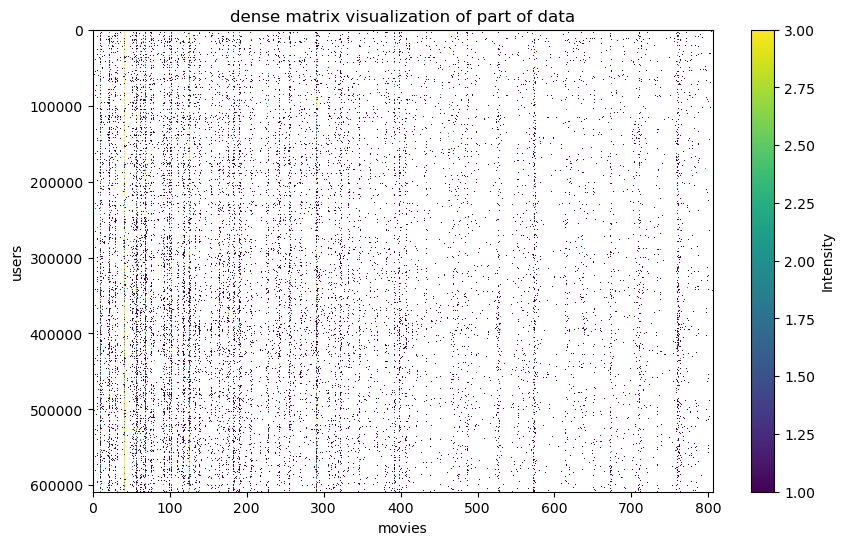

In [4]:
# als je de sims of qtof om will zetten in een matrix die je miss wilt zien
dense_matrix_format = selected_B.toarray()
nans_matrix=np.where(dense_matrix_format==0, np.nan, dense_matrix_format)
print('nu al klaar met nans')
visualizeData(nans_matrix)

In [5]:
shape

array([780, 780], dtype=int64)

In [6]:
780*780

608400

In [7]:

mb = find_massbins(dense_matrix_format)
print(len(mb))

3


In [8]:
mb

[0, 9, 40]

In [13]:

def visualizeMassBin(dense_matrix, massbin,shape):
    picturematrix = dense_matrix[:, massbin].reshape(shape)
    # Plot each matrix with its respective colormap
    fig, ax = plt.subplots()
    cax = ax.imshow(picturematrix, aspect='equal', cmap='cubehelix', interpolation='none')  # Set aspect to 'equal' and use same limits as original data
    ax.set_title(f'Massbin {massbin} Colormap')
    fig.colorbar(cax, ax=ax)
    
    # Add overall title and show the plot
    fig.suptitle(f'Data of Massbin {massbin}', fontsize=16)
    plt.show() 

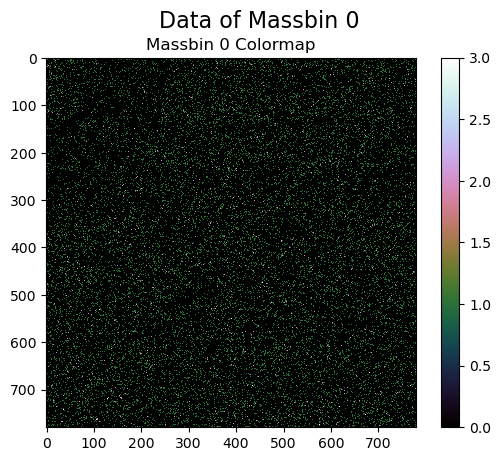

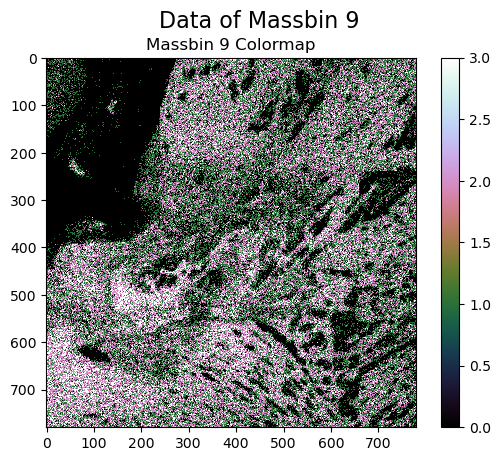

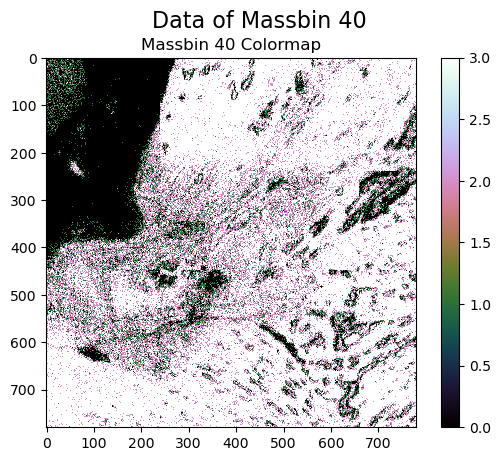

In [14]:
for m in mb[-5:]:
    visualizeMassBin(dense_matrix_format, m,shape)

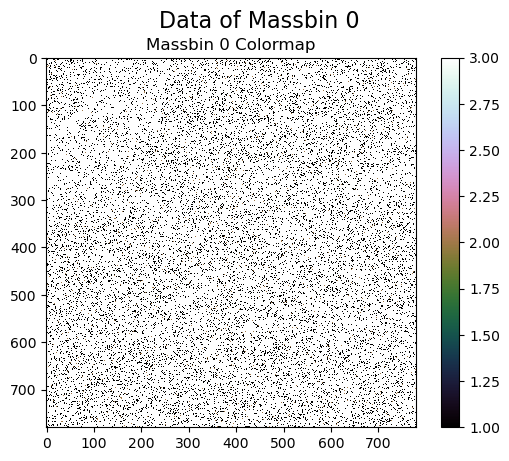

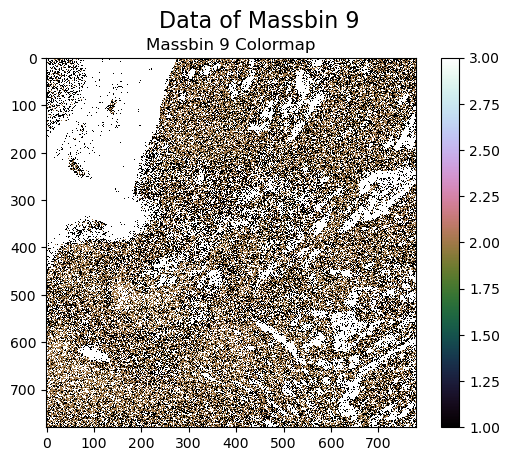

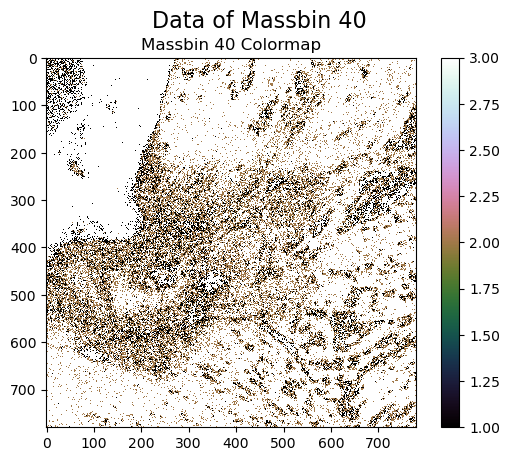

In [15]:
for m in mb[-5:]:
    visualizeMassBin(nans_matrix, m,shape)